Instructions: By continuing the previous model based on the micro video lecture posted(Refer to DS Chapter 6 CARD and C50 Code review). Construct a C5.0 model using the test data set that utilizes the same target variable, predictor variables, and minimum cases criterion. Visualize the decision tree.

In [27]:
import os
import pandas as pd
import graphviz
import statsmodels.tools as stattools
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#Importing files uploaded from google colab to load datasets.
from google.colab import files
uploaded = files.upload()

#Reading the uploaded files into Pandas DataFrame.
adult_test = pd.read_csv("adult_ch6_test")
adult_tr = pd.read_csv("adult_ch6_training")

# save target variable
y = adult_test[['Income']]
#Extracts the variable income and storing its values to variable y.

Saving adult_ch6_test to adult_ch6_test (1)
Saving adult_ch6_training to adult_ch6_training (1)


In [28]:
# convert categorical variable to dummy variables

#Converting the 'adult_test' dataframe's column 'marital status' into numPy array.
mar_np = np.array(adult_test['Marital status'])
# The 'mar_np' NumPy array is performing a one-hot encoding and creating a DataFrame named 'mar_cat'.
mar_cat = pd.get_dummies(mar_np)

In [29]:
# combine the dummy variables back with the

# Creating a DataFrame named 'mar_cat'.
mar_cat_pd = pd.DataFrame(mar_cat)
# Concatenating features into DataFrame 'X'.
X = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [30]:
# specify names of combined matrix and the target variable

#Giving names to the elements in the merged matrix 'X'
X_names = ["Cap_Gains_Losses", "Divorced", "Married", "Never-married", "Separated", "Widowed"]
# Giving names to the target variable groups (income classes) in 'y'
y_names = ["<=50K", ">50K"]

In [31]:
# train C5.0 model

# A C5.0 Decision Tree model is trained using given parameters.
# The model is set up with a maximum of 5 leaf nodes in the decision tree.
c50_01 = DecisionTreeClassifier(criterion="entropy", min_samples_split=75, max_leaf_nodes=5).fit(X,y)

In [32]:
# obtain tree structure with labeles

# Using the export_graphviz function to generate the decision tree structure with labels
# The decision tree's visual information is now contained in the 'data' variable.
data = export_graphviz(c50_01, out_file=None, feature_names=X_names, class_names=y_names)

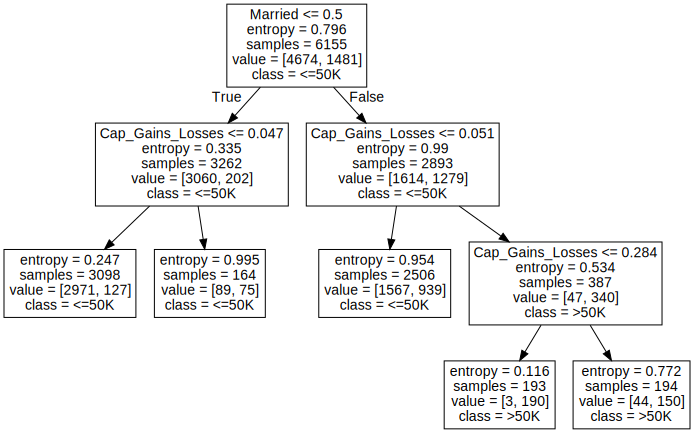

In [33]:
# display the plot

# Graphviz is used to show the decision tree plot based on the produced "data."
# Graphviz is used to render and show the decision tree plot, which gives the model structure a visual representation.
# export_graphviz is used to export a decision tree visualization in a format that can be rendered by external tools, such as Graphviz (Galarnyk, 2020).
graphviz.Source(data)

Use random forests on the training data set to predict income using marital status and capital gains and losses.

In [34]:
# import required packages

# RandomForestClassifier is being imported from the sklearn.ensemble module.
# NumPy import for manipulating arrays and performing numerical calculations
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [35]:
# save target variable

# transferring the 'adult_tr' DataFrame's target value 'Income' to the variable 'y'.
# Now that the variable 'y' has the goal variable 'Income' assigned to it, the model is prepared for training using the characteristics in 'X'.
y = adult_tr['Income']

In [36]:
# convert categorical variable to dummy variables

# transform a category variable into a fake variable
# create a DataFrame called "mar_cat" with dummy variables for the "Marital status" column in the "adult_tr" dataset.
# np.array is for numerical and mathematical operations (Willems, 2023).
mar_np = np.array(adult_tr['Marital status'])
mar_cat = pd.get_dummies(mar_np)

# get is used to access a group of rows and columns by labels or a boolean array (Suhani, 2020).

In [37]:
# combine the dummy variables back with the

# combining the actual feature (Cap_Gains_Losses) and the dummy variables (mar_cat_pd) into DataFrame 'X'
# The original feature 'Cap_Gains_Losses' has now been combined with dummy variables to prepare the DataFrame 'X' for model training or analysis.
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [38]:
# format for random forest model

# Using np.ravel, reshape the target variable "y" into a flattened array so that it works with RandomForestClassifier
# Now that the target variable 'rfy' has been formatted, it can be used to train a Random Forest model as it is an array.
rfy = np.ravel(y)

In [39]:
# train random forest model

# Training 100 estimators in a Random Forest model using Gini impurity as the splitting criteria
# For node splitting, the Random Forest model 'rf01' is set up using 100 estimators and the Gini impurity criteria.
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

In [40]:
# return predictions

# Making predictions on the training set with the Random Forest model 'rf01' that has been trained
# The Random Forest model's predictions based on the training set of data are now stored in the variable 'rf_train'.
rf_train = rf01.predict(X)

Use random forests using the test data set that utilizes the same target and predictor variables. Does the test data result match the training data result?

In [41]:
# save target variable

# Encoding the desired variable 'Income' into the variable 'y' from the testing dataset 'adult_test'
# Using the 'Income' column from the testing data, the goal variable 'y' is now allocated and prepared for analysis or forecasting.
y = adult_test[['Income']]

In [42]:
# convert categorical variable to dummy variables

# Using one-hot encoding, the categorical variable "Marital status" from the "adult_test" DataFrame is transformed into dummy variables.
# In order to simulate the values in the 'Marital status' column of the testing data, a DataFrame named'mar_cat' is constructed.

mar_np = np.array(adult_test['Marital status'])
mar_cat = pd.get_dummies(mar_np)

In [43]:
# combining the original feature "Cap_Gains_Losses" with the dummy variables "mar_cat_pd" into DataFrame "X" for testing
# With the addition of dummy variables, the initial feature 'Cap_Gains_Losses' is now ready for testing on the DataFrame 'X'.
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [44]:
# format for random forest model

# Reshaping the target variable 'y' into a flattened array using np.ravel for compatibility with RandomForestClassifier in testing
# The target variable 'rfy' may now be used to make predictions on the testing data using the Random Forest model that has been trained.
rfy = np.ravel(y)

#np.ravel is used to flatten a multi-dimensional array into a one-dimensional array (Ebner, 2022).

In [45]:
# train random forest model

# Using Gini impurity as the splitting condition and training a Random Forest model with 100 estimators on the testing data
# For predicting the testing data, the Random Forest model 'rf01' is set up using 100 estimators and the Gini impurity criteria.
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

#RandomForestClassifier operates by constructing a multitude of decision trees during training and outputs the class (Shafi, 2023).

In [46]:
# return predictions

#Making predictions on the test data with the Random Forest model 'rf01' that has been trained
# The predictions that the Random Forest model produced using the testing data are now stored in the variable 'rf_test'.
rf_test = rf01.predict(X)

In [47]:
#this should have an output

# Displaying the distribution of predicted classes on the training data using value_counts, normalized by the total number of predictions
# The output provides the proportion of predicted classes in the training data, offering insights into the model's performance.

rf_train = pd.DataFrame(rf_train)
rf_train[0].value_counts() / len(rf_train)

<=50K    0.926123
>50K     0.073877
Name: 0, dtype: float64

In [48]:
#this should have an output

# Using value_counts to display the predicted class distribution on the testing data, normalized by the total number of forecasts
# The percentage of predicted classes in the testing data is provided in the output, which sheds light on how well the model performs with untested data.
rf_test = pd.DataFrame(rf_test)
rf_test[0].value_counts() / len(rf_test)

<=50K    0.926401
>50K     0.073599
Name: 0, dtype: float64

Based on the output, both models should classify the data as 93% for <=50K and 7% for >=50K

**References**

Ebner, J. (2022, July 11). Numpy Ravel, Explained. Retrieved from Sharp Sight: https://www.sharpsightlabs.com/blog/numpy-ravel/

Galarnyk, M. (2020, April 02). Visualizing Decision Trees with Python (Scikit-learn, Graphviz, Matplotlib). Retrieved from Medium: https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

Shafi, A. (2023, February 06). Random Forest Classification with Scikit-Learn. Retrieved from DataCamp: https://www.datacamp.com/tutorial/random-forests-classifier-python

Shuhani, S. (2020, October 08). How to Access a Column in a DataFrame (using Pandas). Retrieved from ActiveState: https://www.activestate.com/resources/quick-reads/how-to-access-a-column-in-a-dataframe-using-pandas/

Willems, K. (2023, February 15). Python Numpy Array Tutorial. Retrieved from DataCamp: https://www.datacamp.com/tutorial/python-numpy-tutorial

